- https://github.com/yang-zhang/ds-math/blob/master/log_loss.ipynb
- https://github.com/yang-zhang/yang-zhang.github.io/blob/master/ds_math/entropy_mutual_information_kl_divergence.ipynb
- https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_error_function_and_logistic_regression

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import sklearn.metrics 

log_loss unit is in nats

In [6]:
def log_loss_binary_scalar(y_true, y_pred, eps=1e-15):
    if y_pred < eps:
        y_pred = eps
    elif y_pred > 1 - eps:
        y_pred = 1 - eps
    if y_true == 1:
        return -np.log(y_pred)
    else:
        return -np.log(1 - y_pred)

In [7]:
log_loss_binary_scalar(0, 0.1), sklearn.metrics.log_loss([0], [0.1], labels=(0, 1), eps=1e-15)

(0.10536051565782628, 0.10536051565782628)

In [8]:
log_loss_binary_scalar(1, 0.9), sklearn.metrics.log_loss([1], [0.9], labels=(0, 1), eps=1e-15)

(0.10536051565782628, 0.10536051565782628)

In [9]:
log_loss_binary_scalar(1, 0, eps=1e-15), sklearn.metrics.log_loss([1], [0], labels=(0, 1), eps=1e-15)

(34.538776394910684, 34.538776394910684)

In [10]:
log_loss_binary_scalar(1, 0, eps=1e-10), sklearn.metrics.log_loss([1], [0], labels=(0, 1), eps=1e-10)

(23.025850929940457, 23.025850929940457)

In [11]:
log_loss_binary_scalar(1, 0, eps=1e-100), sklearn.metrics.log_loss([1], [0], labels=(0, 1), eps=1e-100)

(230.25850929940458, 230.25850929940458)

### binary

In [12]:
labels = [0, 1, 1]
preds = [0.2, 0.9, 0.9]

print("Sklearn:", sklearn.metrics.log_loss(labels, preds, eps=1e-15))


def log_loss(y_true, y_pred, eps=1e-15):
    total_loss = 0.
    n = 0.
    for label, pred in zip(labels, preds):
        if pred < eps:
            pred = eps
        elif pred > 1 - eps:
            pred = 1 - eps
        if label == 1:
            total_loss += -np.log(pred)
        else:
            total_loss += -np.log(1 - pred)
        n += 1
    return total_loss / n

print("Ours:", log_loss(labels, preds))

Sklearn: 0.14462152754328741
Ours: 0.14462152754328741


### labels

In [13]:
labels = [0, 1, 2, 0]
preds = [[0.2, 0.8, 0.0], 
         [0.9, 0.05, 0.05], 
         [0.5, 0.1, 0.4],
         [0.1, 0.1, 0.8]]

print("Sklearn:", sklearn.metrics.log_loss(labels, preds, eps=1e-15))

def log_loss(y_true, y_pred, eps=1e-15):
    total_loss = 0.
    n = 0.
    for label, ps in zip(labels, preds):
        p = ps[label]
        if p < eps:
            p = eps
        elif p > 1 - eps:
            p = 1 - eps
        total_loss += -np.log(p)
        n += 1
    return total_loss / n

print("Ours:", log_loss(labels, preds))

Sklearn: 1.9560115027140732
Ours: 1.9560115027140728


In [14]:
np.log([.5, .5])

array([-0.69314718, -0.69314718])

In [15]:
np.log([.3, 0.3, 0.4])

array([-1.2039728 , -1.2039728 , -0.91629073])

In [16]:
def cross_entropy(p, q):
    ce = .0
    for pi, qi in zip(p, q):
        if qi > 0:
            ce += -(pi * np.log(qi))
    return ce

def entropy(p):
    p = np.array(p)
    sum_ = .0
    for pi in p:
        if pi > 0:
            sum_ += -pi * np.log(pi) 
    return sum_

def kl_divergence(p, q):
    p, q = np.array(p), np.array(q)
    sum_ = 0
    for i, pi in enumerate(p):
        if pi != 0 and q[i] > 0:
            sum_ += pi * np.log(pi/q[i])
    return sum_

In [17]:
p = [0.5, 0.5]
q = [0.5, 0.5]
cross_entropy(p, q), entropy(p), kl_divergence(p, q)

(0.6931471805599453, 0.6931471805599453, 0.0)

In [18]:
p = [0.1, 0.9]
q =  [0.1, 0.9]
cross_entropy(p, q), entropy(p), kl_divergence(p, q), cross_entropy(p, q) == entropy(p) + kl_divergence(p, q)

(0.3250829733914482, 0.3250829733914482, 0.0, True)

In [19]:
p = [0.1, 0.9]
q =  [0.2, 0.8]
cross_entropy(p, q), entropy(p), kl_divergence(p, q), cross_entropy(p, q) == entropy(p) + kl_divergence(p, q)

(0.3617729874261988, 0.3250829733914482, 0.036690014034750584, True)

In [20]:
p = [1, 0]
q =  [1, 0]
cross_entropy(p, q), entropy(p), kl_divergence(p, q), log_loss_binary_scalar(p[0], q[0], eps=1e-15), log_loss_binary_scalar(p[1], q[1], eps=1e-15)

(0.0, 0.0, 0.0, 9.992007221626415e-16, 9.992007221626415e-16)

In [21]:
p = [1, 0]
q =  [0, 1]
cross_entropy(p, q), entropy(p), kl_divergence(p, q), log_loss_binary_scalar(p[0], q[0], eps=1e-15), log_loss_binary_scalar(p[1], q[1], eps=1e-15)

(0.0, 0.0, 0, 34.538776394910684, 34.53957599234088)

In [22]:
p = [1, 0]
q = [0.9, 0.1]
cross_entropy(p, q), entropy(p), kl_divergence(p, q), log_loss_binary_scalar(p[0], q[0], eps=1e-15), log_loss_binary_scalar(p[1], q[1], eps=1e-15)

(0.10536051565782628,
 0.0,
 0.10536051565782635,
 0.10536051565782628,
 0.10536051565782628)

In [23]:
p = [1, 0]
q = [0.999, 0.001]
cross_entropy(p, q), entropy(p), kl_divergence(p, q), log_loss_binary_scalar(p[0], q[0], eps=1e-15), log_loss_binary_scalar(p[1], q[1], eps=1e-15)

(0.0010005003335835344,
 0.0,
 0.001000500333583622,
 0.0010005003335835344,
 0.0010005003335835344)

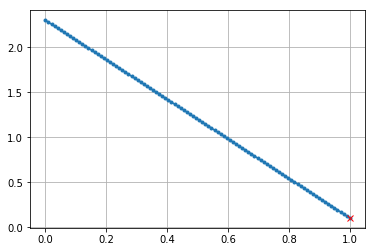

In [24]:
ces = []
ps = np.linspace(0, 1, num=100)
q = [0.9, 0.1]
for p in ps:
    ces.append(cross_entropy([p, 1-p], q))

plt.plot(ps, ces, '.-')
plt.plot(ps[-1], log_loss_binary_scalar(1, q[0], eps=1e-15), 'xr')
plt.grid()

where does perfect, worse, and random baseline land?

In [25]:
sklearn.metrics.log_loss([1, 0, 1], [1, 0, 1])

9.992007221626415e-16

In [26]:
sklearn.metrics.log_loss([1, 0], [0, 1])

34.53917619362578

In [27]:
sklearn.metrics.log_loss([1, 0]*200, [0, 1]*200)

34.53917619362577

In [28]:
np.log(34.53)

3.541828511401901

In [29]:
x=10
10**(-x)

1e-10

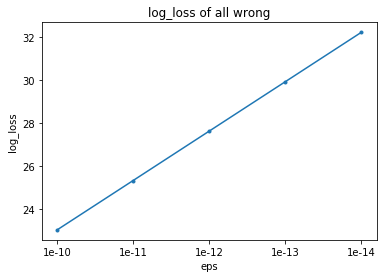

In [30]:
lls = []
epses = [10**(-x) for x in range(10, 15)]
for eps in epses:
    lls.append(sklearn.metrics.log_loss([1, 0], [0, 1], eps=eps))
plt.plot(lls, '.-')
plt.xticks(range(len(lls)), epses)
plt.xlabel('eps')
plt.ylabel('log_loss')
plt.title('log_loss of all wrong')
plt.show()

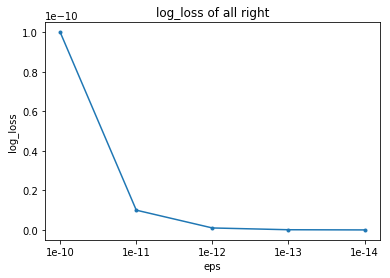

In [31]:
lls = []
epses = [10**(-x) for x in range(10, 15)]
for eps in epses:
    lls.append(sklearn.metrics.log_loss([1, 0], [1, 0], eps=eps))
plt.plot(lls, '.-')
plt.xticks(range(len(lls)), epses)
plt.title('log_loss of all right')
plt.xlabel('eps')
plt.ylabel('log_loss')
plt.show()

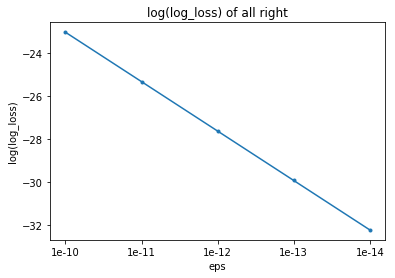

In [32]:
lls = []
epses = [10**(-x) for x in range(10, 15)]
for eps in epses:
    lls.append(sklearn.metrics.log_loss([1, 0], [1, 0], eps=eps))
plt.plot(np.log(lls), '.-')
plt.xticks(range(len(lls)), epses)
plt.title('log(log_loss) of all right')
plt.xlabel('eps')
plt.ylabel('log(log_loss)')
plt.show()

#### effect of very high scores

In [33]:
pred = [0.01, 0.99]
sklearn.metrics.log_loss([1, 0], pred), sklearn.metrics.log_loss([0, 1], pred)
sklearn.metrics.log_loss([1, 0], pred)

4.605170185988091

In [34]:
s1 = sklearn.metrics.log_loss([1], [0], labels=[0, 1])
s2 = sklearn.metrics.log_loss([1], [1], labels=[0, 1])
np.mean([s1, s2])

17.269388197455342

In [35]:
s1 = sklearn.metrics.log_loss([1], [0.01], labels=[0, 1])
s2 = sklearn.metrics.log_loss([1], [0.99], labels=[0, 1])
np.mean([s1, s2])

2.307610260920796

In [36]:
s1 = sklearn.metrics.log_loss([1], [0.1], labels=[0, 1])
s2 = sklearn.metrics.log_loss([1], [0.9], labels=[0, 1])
np.mean([s1, s2])

1.203972804325936

In [37]:
s1 = sklearn.metrics.log_loss([1], [0.2], labels=[0, 1])
s2 = sklearn.metrics.log_loss([1], [0.8], labels=[0, 1])
np.mean([s1, s2])

0.916290731874155

In [38]:
s1 = sklearn.metrics.log_loss([1], [0.5], labels=[0, 1])
s2 = sklearn.metrics.log_loss([1], [0.5], labels=[0, 1])
np.mean([s1, s2])

0.6931471805599453

In [39]:
sklearn.metrics.log_loss([1, 1, 1, 0], [1, 1, 1, 1])

8.63489399808522

In [40]:
sklearn.metrics.log_loss([1, 1, 1, 0], [0.99, 0.99, 0.01, 0.99])

2.3076102609207965

### not changing with number of label if conf per correct lable is the same 

In [41]:
from sklearn.metrics import log_loss

log_loss([0, 1, 2],
         [[.9, .1, .0], 
          [.0, .9, .1], 
          [.1, .0, .9]]), \
log_loss([0, 1, 1], 
         [[.9, .1], 
          [.1, .9], 
          [.1, .9]]), \
log_loss([0, 1, 2], 
         [[.9, .05, .05], 
          [.05, .9, .05], 
          [.05, .05, .9]])

(0.10536051565782739, 0.10536051565782628, 0.10536051565782628)